In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_acceleration_data(config, frequency=10, base_accel=1.0, noise_level=0.02):
    """
    Generate realistic acceleration data based on a configuration array.
    
    Parameters:
        config (list of dict): Configuration for each driving interval.
        frequency (int): Data points per second.
        base_accel (float): Base acceleration (g-force).
        noise_level (float): Standard deviation of noise to add.
        
    Returns:
        np.ndarray: Array of simulated acceleration values.
    """
    # Define acceleration rates for different modes (in g/s²)
    rate_map = {
        "gentle": 0.05,        # ~0.5 m/s²
        "intermediate": 0.1,    # ~1.0 m/s²
        "sharp": 0.2            # ~2.0 m/s²
    }
    
    # Define spike intensities
    spike_map = {
        "low": 1.5,     # Low intensity spike
        "medium": 2.0,  # Medium intensity spike
        "high": 3.0     # High intensity spike
    }
    
    # Initialize the acceleration data list
    acceleration_data = []
    current_accel = base_accel
    
    # Generate data based on the configuration
    for step in config:
        mode = step["mode"]
        interval = step["interval"]
        num_points = int(interval * frequency)

        if mode == "constant":
            # Generate constant acceleration with noise
            data = np.full(num_points, current_accel) + np.random.normal(0, noise_level, num_points)

        elif mode in ["acceleration", "deceleration"]:
            # Get acceleration rate (positive for acceleration, negative for deceleration)
            rate_type = step.get("rate", "gentle")
            rate = rate_map.get(rate_type, 0.05)
            if mode == "deceleration":
                rate = -rate
            
            # Generate linear acceleration data for the specified interval
            target_accel = current_accel + rate * interval
            data = np.linspace(current_accel, target_accel, num_points)
            
            # Add random noise
            data += np.random.normal(0, noise_level, num_points)
            
            # Update the current acceleration state
            current_accel = target_accel

        elif mode == "spike":
            # Generate a sudden spike in acceleration
            nature = step.get("nature", "medium")
            spike_intensity = spike_map.get(nature, 2.0)
            
            # Create a spike pattern: quick rise and fall within the interval
            half_points = num_points // 2
            spike_up = np.linspace(current_accel, current_accel + spike_intensity, half_points)
            spike_down = np.linspace(current_accel + spike_intensity, current_accel, num_points - half_points)
            data = np.concatenate([spike_up, spike_down])
            
            # Add random noise
            data += np.random.normal(0, noise_level, num_points)

        else:
            raise ValueError(f"Unknown mode: {mode}")

        # Append the generated data to the main list
        acceleration_data.extend(data)

    # Clip values to keep within a realistic range (0.8g to 3.5g)
    acceleration_data = np.clip(acceleration_data, 0.8, 3.5)

    # Optional: Plot the data for visualization
    plt.figure(figsize=(10, 4))
    plt.plot(acceleration_data, label="Simulated Acceleration Data")
    plt.xlabel("Time (samples)")
    plt.ylabel("Acceleration (g)")
    plt.title("Generated Car Ride Acceleration Data")
    plt.legend()
    plt.grid(True)
    plt.show()

    return np.array(acceleration_data)


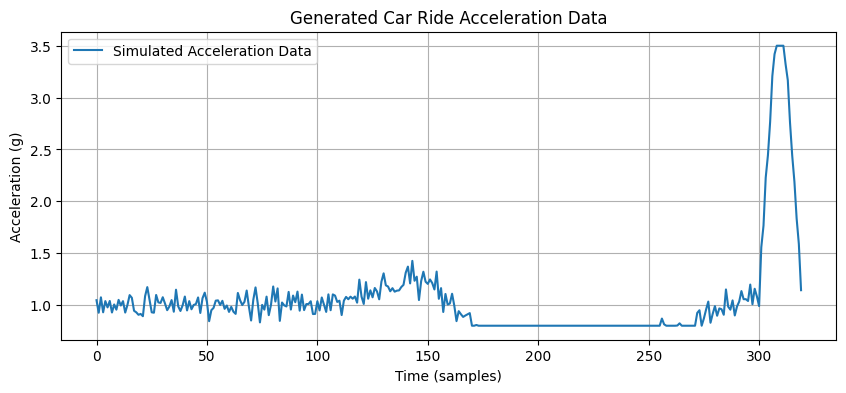

In [4]:

# Example configuration
config = [
    {"interval": 10, "mode": "constant"},
    {"interval": 5, "mode": "acceleration", "rate": "gentle"},
    {"interval": 3, "mode": "deceleration", "rate": "sharp"},
    {"interval": 7, "mode": "constant"},
    {"interval": 5, "mode": "acceleration", "rate": "intermediate"},
    {"interval": 2, "mode": "spike", "nature": "high"}
]

# Generate the data
acceleration_data = generate_acceleration_data(
    config, frequency=10, base_accel=1.0, noise_level=0.05)